In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('spotify_data.csv')
data['date_added'] = pd.to_datetime(data['date_added'])

This dataset represents every song I've added to a spotify playlist in the ~6 years I've been using spotify. Using Spotifies python API wrapper, spotipy, I downloaded all of the audio features for the songs, such as danceability/acousticness and when the song was added to a playlist. Hopefully I can analyze the data to see how my listening habits have changed over time. Without any help, I can generally remember what genres and artists I listened to in the past, but maybe there is some relationship deeper than just genre hidden in the data.

In [84]:
data.head()

,Unnamed: 0,track_id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_sig,date_added
0,0,17Y2K7uNxMkaTDBtf1Tcv3,Let A Woman Be A Woman - Let A Man Be A Man,Dyke & The Blazers,0.830,0.565,9,-11.013,0,0.0507,0.00784,0.004290,0.0873,0.873,112.163,193680,4,2015-05-05 18:58:31+00:00
1,1,4pW3aTX3kAmOaPJfc9UM12,Express Yourself,Charles Wright & The Watts 103rd Street Rhythm...,0.789,0.683,8,-8.835,1,0.0860,0.48000,0.000000,0.3500,0.882,92.311,233613,4,2015-05-28 18:34:26+00:00
2,2,2j6GCSzFpdYkpUGVC9WPEY,Baby I Love You,Cold Blood,0.594,0.913,7,-9.318,1,0.0918,0.10200,0.022300,0.0443,0.645,108.128,370613,4,2015-05-28 18:35:28+00:00
3,3,75ZFEL0MYrPGIVTEre7pwL,In The Deep,The Beginning Of The End,0.623,0.802,2,-6.448,0,0.0560,0.52800,0.000073,0.3340,0.831,113.439,293627,4,2015-05-28 18:36:11+00:00
4,4,6C7a0oCVDLXBjhCBeEG8vk,Wanaoh,Black Heat,0.588,0.879,5,-13.098,1,0.0385,0.04730,0.915000,0.1810,0.915,103.701,232467,4,2015-05-28 18:36:24+00:00


First up, lets see what happens when trying to do a basic time-series visualization of one of the audio features.

In [85]:
time_sorted = data.sort_values('date_added') #lets rearrange the data by date added

Text(0.5, 1.0, 'danceability over time')

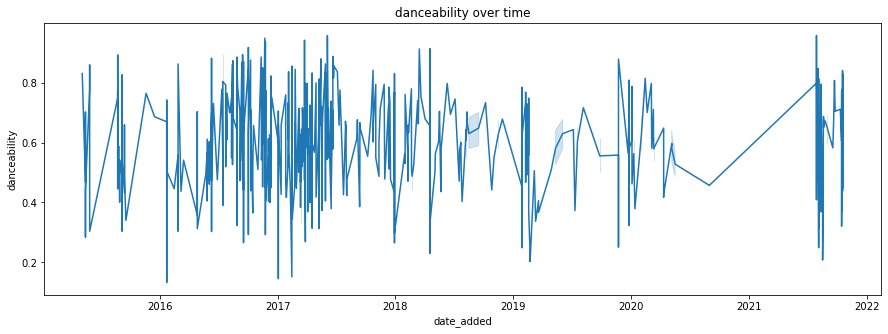

In [86]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='date_added', y='danceability', data=time_sorted).set_title('danceability over time')

Quite frankly, this looks terrible. The plot is very scrunched around the times that I was using spotify heavily, and basically unreadable at that point (around 2017). Maybe a better way would be to renormalize the danceability depending on how far away from the average danceability it is. 

In [87]:
avg_danceability = sum(data['danceability'])/len(data['danceability'])
time_sorted['danceability'] = time_sorted['danceability'] - avg_danceability

In [88]:
time_sorted.head(10)

,Unnamed: 0,track_id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_sig,date_added
0,0,17Y2K7uNxMkaTDBtf1Tcv3,Let A Woman Be A Woman - Let A Man Be A Man,Dyke & The Blazers,0.232791,0.565,9,-11.013,0,0.0507,0.007840,0.004290,0.0873,0.873,112.163,193680,4,2015-05-05 18:58:31+00:00
43,43,5xC8uOesnn0udeXAYlAnoY,Alright,Supergrass,-0.130209,0.958,4,-4.808,0,0.0775,0.000479,0.199000,0.2990,0.701,145.920,180880,4,2015-05-15 18:16:25+00:00
44,44,305WCRhhS10XUcH6AEwZk6,Are You Gonna Be My Girl,Jet,0.015791,0.953,2,-3.435,1,0.0855,0.001480,0.000582,0.1520,0.537,105.046,213800,4,2015-05-15 18:16:31+00:00
45,45,1pHP4JeQV9wDx87D6qH9hD,Here It Goes Again,OK Go,-0.060209,0.882,0,-2.306,1,0.0403,0.000342,0.000091,0.1200,0.810,145.729,179813,4,2015-05-15 18:16:38+00:00
46,46,2MVwrvjmcdt4MsYYLCYMt8,Tighten Up,The Black Keys,-0.093209,0.705,6,-6.179,0,0.0665,0.001210,0.000004,0.4530,0.567,108.965,211080,4,2015-05-15 18:16:57+00:00
47,47,284eB4ONFTw8ARgJe29Pp3,Strange Desire,The Black Keys,-0.240209,0.599,7,-6.340,1,0.0402,0.699000,0.051900,0.1120,0.330,128.731,260973,4,2015-05-15 18:17:09+00:00
48,48,2BodCfcjTxsHSoQq6uFBlJ,Dreaming of You,The Coral,-0.156209,0.684,9,-7.495,0,0.0310,0.374000,0.000848,0.1080,0.971,199.001,141000,4,2015-05-15 18:18:12+00:00
49,49,2F3dEXRcLx9nQT8qCnHj1j,Evil Eye,Franz Ferdinand,0.104791,0.815,11,-3.289,0,0.0296,0.014800,0.000039,0.0486,0.819,110.968,167253,4,2015-05-15 18:18:32+00:00
50,50,2sHFd48VMnInguyfh3K9jT,Inhaler,Miles Kane,-0.228209,0.925,11,-3.854,0,0.0621,0.001280,0.000032,0.0849,0.538,161.964,182667,4,2015-05-15 18:19:20+00:00
51,51,79DO6dBi8936P6EShLB209,Lightning Bolt,Jake Bugg,-0.046209,0.839,9,-4.555,1,0.0787,0.081800,0.000000,0.1510,0.681,116.051,144013,4,2015-05-15 18:19:32+00:00


That seemed to work, but what now? I'm interested in the trend over 6 years, not on a day to day basis really. So let's take a moving sum of each point, and plot that. The 50th point plotted will be the sum of the first 50 danceability scores. This will remove the clutter around the specific time added while preserving the chronological order, and will show an overall increase or decrease in danceability over time. 

In [89]:
moving_sum = [0] #initialize with 0 so the sum indexing is easy. 
for i in time_sorted['danceability']:
    moving_sum.append(moving_sum[-1]+i)

moving_sum.remove(0) #get rid of the 0 from earlier.
moving_sum_df = pd.DataFrame({'dates':time_sorted['date_added'], 'danceability':moving_sum})

Text(0.5, 1.0, 'Moving Sum')

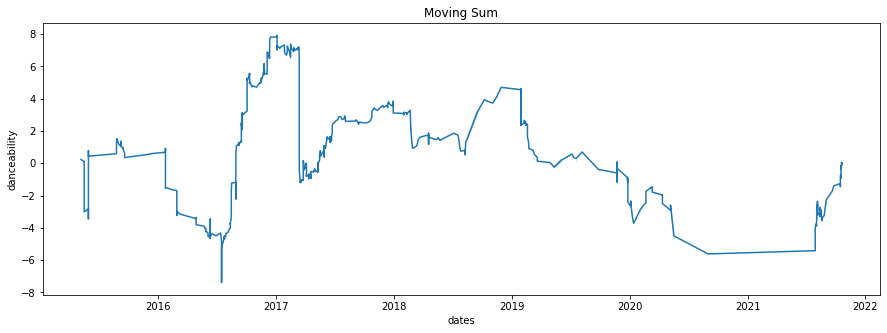

In [90]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='dates', y='danceability', data=moving_sum_df).set_title('Moving Sum')

This is certainly better! Here the flat sections correspond to times I wasn't using Spotify. It's also clear that there were times (mid 2016 - early 2017) that I was creating some dance playlists, and a general trend from 2019 to 2021 where I wasn't dancing. Can't imagine what would have caused that.

Lets try one more thing just for fun. This time, I'll use the moving-sum idea to make the time component more salient, but instead of adding just the danceability, I'll use the difference in danceability compared to the last track added. In this manner, if I consistently added increasingly danceable tracks over time, the moving sum will increase. Naturally, there's a limit to how danceable a track is, and so eventually it will trend back downwards.

In [91]:
dance_diff = [time_sorted['danceability'][0]]
for i, d in enumerate(time_sorted['danceability'][1:]):
    dance_diff.append(dance_diff[-1]+(d-time_sorted['danceability'][i]))
    
dance_diff_df = pd.DataFrame({'date added':time_sorted['date_added'], 'dance trend': dance_diff})

Text(0.5, 1.0, 'Self-Relative Danceability')

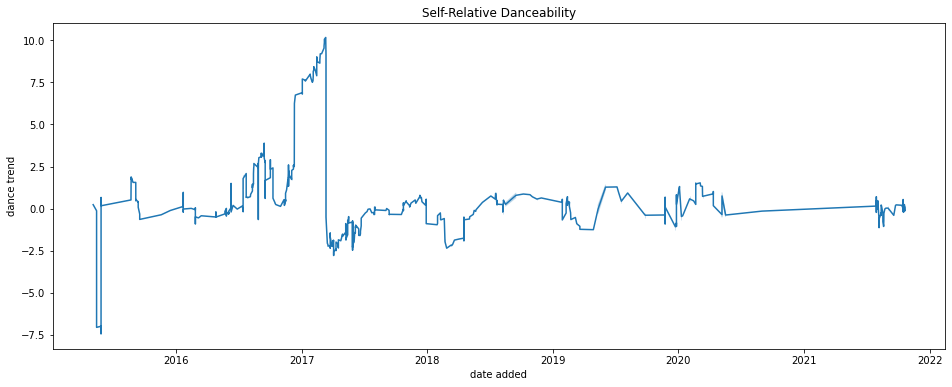

In [92]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='date added',y='dance trend', data=dance_diff_df, ax=ax).set_title('Self-Relative Danceability')

This does seem to show a similar trend in 2017, but for the most part it's just a graph scattered around 0. Oh well, this idea didn't seem to pan out much.

Lets go back to that moving sum idea, except this time plot it for the other audio features as well. First lets center the data around their respective averages 

In [93]:
averages = data.mean(axis=0, numeric_only=True)
print(averages)

Unnamed: 0             955.000000
danceability             0.597209
energy                   0.600875
key                      5.199895
loudness                -9.170692
mode                     0.663004
speechiness              0.070859
acousticness             0.332849
instrumentalness         0.155325
liveness                 0.187314
valence                  0.615060
tempo                  117.029844
duration_ms         246617.292517
time_sig                 3.931450
dtype: float64


In [94]:
#probably quicker to just do this manually for each one
time_sorted['energy'] = time_sorted['energy'] - .6
time_sorted['acousticness'] = time_sorted['acousticness'] - .333
time_sorted['instrumentalness'] = time_sorted['instrumentalness'] - .155
time_sorted['liveness'] = time_sorted['liveness'] - .187
time_sorted['valence']= time_sorted['valence'] - .615

In [95]:
moving_sums_df = pd.DataFrame({'dates': time_sorted['date_added']})
columns = ['energy', 'acousticness', 'valence', 'instrumentalness', 'acousticness']
for c in columns:
    moving_sums = [0] #initialize with 0 so the sum indexing is easy. 
    for i in time_sorted[c]:
        moving_sums.append(moving_sums[-1]+i)

    moving_sums.remove(0) #get rid of the 0 from earlier.
    moving_sums_df[c] = moving_sums
moving_sums_df['danceability'] = moving_sum

Text(0.5, 1.0, 'Moving Sums')

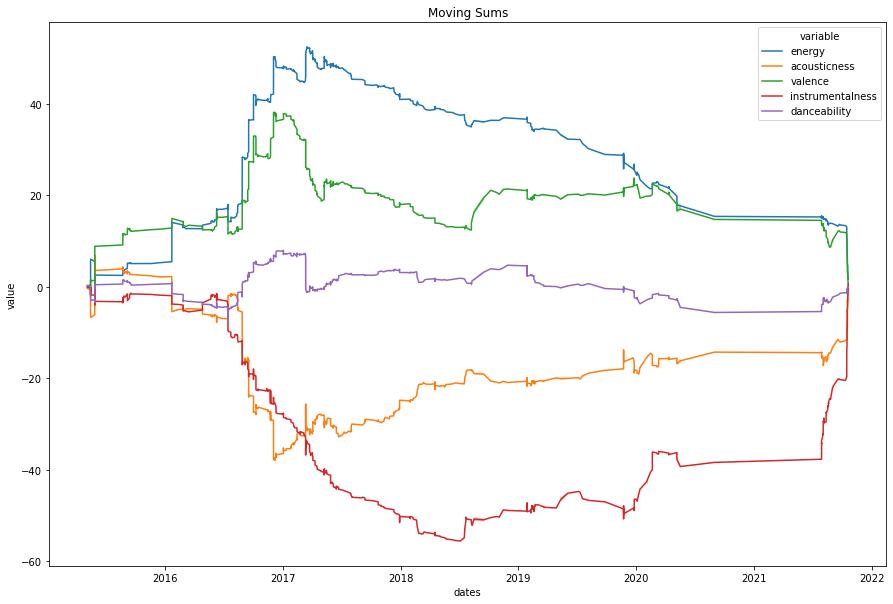

In [96]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='dates', y='value', hue='variable', data=pd.melt(moving_sums_df, ['dates'])).set_title('Moving Sums')

The actual y-values in this plot don't really matter. Since this plot is just about the movement of the features relative to their own average, it's more the slope of the lines that is important. An upwards slope indicated a time when I was adding many songs that were relatively danceable/energetic etc to a playlist. 

Interestingly, several of the lines seem to move in tandem. The energy and valence features follow eachother for most of the plot except for mid-late 2018 (valence is Spotify's word for happiness, roughly). It's worth mentioning that as 2017 came on, several features diverged, with energy/valence/danceability trending upwards and acousticness/instrumentalness decreasing. For the most part, this seems appropriate as dance songs are usually energetic. It seems after ~2018 that my listening habits have changed though, with the features converging again. Perhaps my taste changed after graduation.   